In [123]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6


#The Machine learning alogorithm
from sklearn.ensemble import RandomForestClassifier

# Test train split
from sklearn.cross_validation import train_test_split

# Just to switch off pandas warning
pd.options.mode.chained_assignment = None

# Used to write our model to a file
from sklearn.externals import joblib

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [124]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
#Используется для записи модели в файл
from sklearn.externals import joblib

In [126]:
data = pd.read_csv("train.csv")
#data.head()
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [127]:
#заменяем пустые поля медианой #или просто обрезать ? data = data.dropna()

median_age = data['Age'].median()
print("Median age is {}".format(median_age))

Median age is 28.0


In [128]:
data['Age'].fillna(median_age, inplace = True)

data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      28.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     28.0
18     31.0
19     28.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     28.0
27     19.0
28     28.0
29     28.0
       ... 
861    21.0
862    48.0
863    28.0
864    24.0
865    42.0
866    27.0
867    31.0
868    28.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    28.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

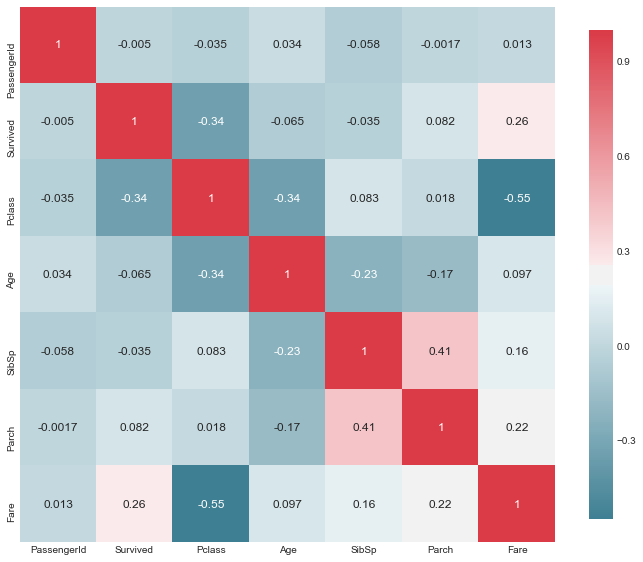

In [129]:

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map( data )

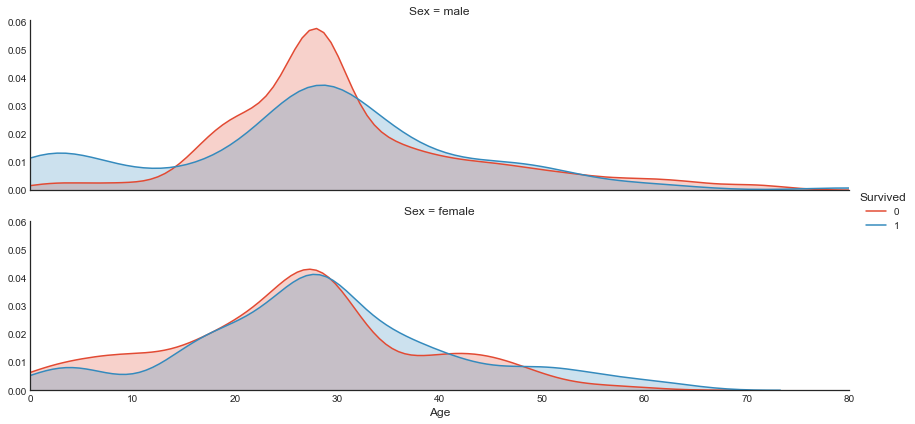

In [130]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()


# Plot distributions of Age of passangers who survived or did not survive
plot_distribution( data , var = 'Age' , target = 'Survived' , row = 'Sex' )

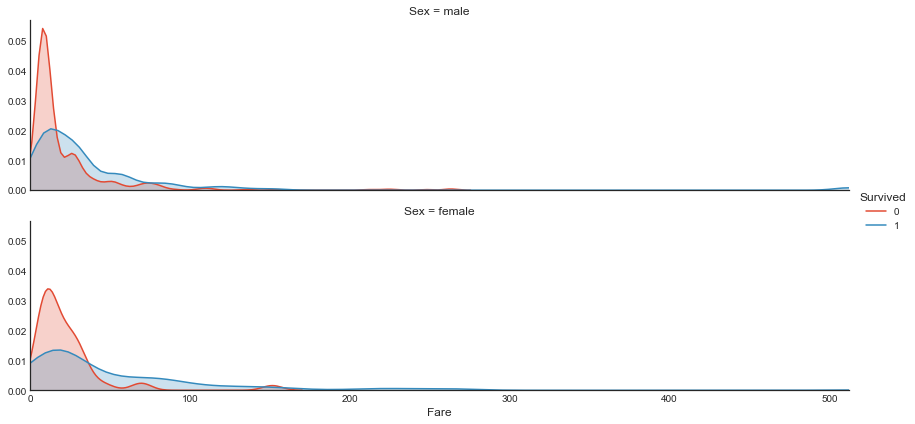

In [131]:
plot_distribution( data , var = 'Fare' , target = 'Survived' , row = 'Sex' )

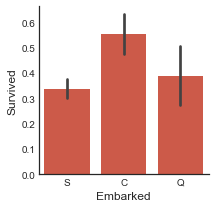

In [132]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
plot_categories( data , cat = 'Embarked' , target = 'Survived' )

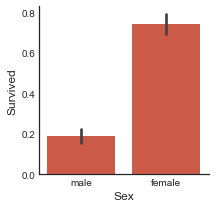

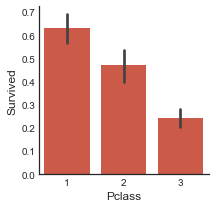

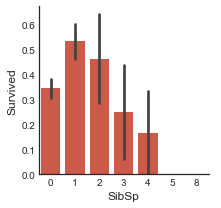

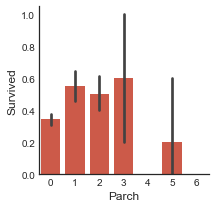

In [133]:
plot_categories( data , cat = 'Sex' , target = 'Survived' )
plot_categories( data , cat = 'Pclass' , target = 'Survived' )
plot_categories( data , cat = 'SibSp' , target = 'Survived' )
plot_categories( data , cat = 'Parch' , target = 'Survived' )

In [134]:
#Теперь нужно извлечь три нужных нам поля: class (класс), age (возраст), sex (пол).
data_inputs = data[["Pclass", "Age", "Sex"]]
data_inputs.head()

,Pclass,Age,Sex
0,3,22.0,male
1,1,38.0,female
2,3,26.0,female
3,1,35.0,female
4,3,35.0,male


In [135]:
#Ожидаемые выходные данные:
expected_output = data[["Survived"]]
expected_output.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [136]:
#Остаётся поправить проблему с полом.
data_inputs["Sex"] = np.where(data_inputs["Sex"] == "female", 0, 1)
data_inputs.head()
#Функция заменила female на 0 и male на 1.

,Pclass,Age,Sex
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1


In [137]:
inputs_train, inputs_test, expected_output_train, expected_output_test = train_test_split(data_inputs, expected_output, test_size = 0.33, random_state = 42)
#Функция возвращает учебные входные и выходные данные, а также выходной набор данных.
#test_size=0.33 значит, что 33% набора данных будет использоваться для тестирования, 
#остальное — для обучения. 
#random_state используется для запуска встроенного генератора случайных выборок.
print(inputs_train.head())
print(expected_output_train.head())

     Pclass   Age  Sex
6         1  54.0    1
718       3  28.0    1
685       2  25.0    1
73        3  26.0    1
882       3  22.0    0
     Survived
6           0
718         0
685         0
73          0
882         0


In [138]:
# запустим машинное обучение
rf = RandomForestClassifier (n_estimators=100)
#Создаём образец алгоритма Random forest
rf.fit(inputs_train, expected_output_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [139]:
#Проверка качества
accuracy = rf.score(inputs_test, expected_output_test)
print("Accuracy = {}%".format(accuracy * 100))

Accuracy = 77.9661016949%


In [140]:
joblib.dump(rf, "titanic_model1", compress=9)

['titanic_model1']

In [141]:
test_data = pd.read_csv("test.csv")
#test_data.head()
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [142]:
#заменяем пустые поля медианой
median_age = test_data['Age'].median()
print("Median age is {}".format(median_age))

Median age is 27.0


In [143]:
test_data['Age'].fillna(median_age, inplace = True)
test_data['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
5      14.0
6      30.0
7      26.0
8      18.0
9      21.0
10     27.0
11     46.0
12     23.0
13     63.0
14     47.0
15     24.0
16     35.0
17     21.0
18     27.0
19     45.0
20     55.0
21      9.0
22     27.0
23     21.0
24     48.0
25     50.0
26     22.0
27     22.5
28     41.0
29     27.0
       ... 
388    21.0
389     6.0
390    23.0
391    51.0
392    13.0
393    47.0
394    29.0
395    18.0
396    24.0
397    48.0
398    22.0
399    31.0
400    30.0
401    38.0
402    22.0
403    17.0
404    43.0
405    20.0
406    23.0
407    50.0
408    27.0
409     3.0
410    27.0
411    37.0
412    28.0
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [144]:
#Теперь нужно извлечь три нужных нам поля: class (класс), age (возраст), sex (пол).
test_data_inputs = test_data[["Pclass", "Age", "Sex"]]
test_data_inputs.head()

,Pclass,Age,Sex
0,3,34.5,male
1,3,47.0,female
2,2,62.0,male
3,3,27.0,male
4,3,22.0,female


In [145]:
#Остаётся поправить проблему с полом.
test_data_inputs["Sex"] = np.where(test_data_inputs["Sex"] == "female", 0, 1)
test_data_inputs.head()
#Функция заменила female на 0 и male на 1.

,Pclass,Age,Sex
0,3,34.5,1
1,3,47.0,0
2,2,62.0,1
3,3,27.0,1
4,3,22.0,0


In [146]:
test_data_inputs

,Pclass,Age,Sex
0,3,34.5,1
1,3,47.0,0
2,2,62.0,1
3,3,27.0,1
4,3,22.0,0
5,3,14.0,1
6,3,30.0,0
7,2,26.0,1
8,3,18.0,0
9,3,21.0,1


In [147]:
rf = joblib.load("titanic_model1")
pred = rf.predict(test_data_inputs)
pred




array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [148]:
#def find_err(pred):
#    titanic_data = np.loadtxt("titanic_results.txt", dtype="int32")
#    diff_arr = np.equal(titanic_data, pred)
#    correct_answers = np.sum(diff_arr)
#    percent_diff = correct_answers / len(pred) * 100
#    print("Titanic: Percentage Match is: ", percent_diff)
    
#find_err(pred)

In [107]:
from pandas import DataFrame
res_svm = DataFrame(pred,columns=['Survived'])
res_svm.to_csv("rf.csv")

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [197]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(inputs_train, expected_output_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [198]:
# Score the model
print (model.score( inputs_train, expected_output_train ) , model.score( data_inputs, expected_output ))

(0.8523489932885906, 0.8260381593714927)


In [205]:
 = model.predict( test_data_inputs)
test_Y


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [211]:
full = data.append( test_data , ignore_index = True )
titanic = full[ :891 ]
passenger_id = full[891:].PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_Y } )
test.shape
test.head()
test.to_csv( 'kNeighbors.csv' , index = False )
